### Зададчи:

**1.Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.**

**2.Какой клиент совершил больше всего успешных операций? (success == True)**

**3.С какой платформы осуществляется наибольшее количество успешных операций?**

**4.Какую платформу предпочитают премиумные клиенты?**

**5.Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)**

**6.Постройте график распределения числа успешных операций**

**7.Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?**

#### Откроем файлы и предобработаем

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings('ignore')

sns.set(rc = {'figure.figsize':(6,4)})

In [3]:
users = pd.read_csv('/Users/v.obrosova/Documents/СТАТИСТИКА/csv/user_data.csv')
logs = pd.read_csv('/Users/v.obrosova/Documents/СТАТИСТИКА/csv/logs.csv', parse_dates = ['time'])

описание данных:
#### user_data:

**client** – идентификатор пользователя,

**premium** – является ли клиент премиум

**age** – возраст

#### logs:

**client** – идентификатор пользователя

**success** – результат (успех - 1, нет - 0)

**platform** – платформа

**time** – время в формате Unix

#### 1.Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

 - просмотрим пункты задания 1 для таблицы Users

In [4]:
users.shape

(2954, 3)

In [5]:
users.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [6]:
users.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [12]:
users.duplicated().sum()

0

In [7]:
users.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


- просмотрим те же пункты для таблицы logs

In [8]:
logs.shape

(4500, 4)

In [9]:
logs.dtypes

client       int64
success       bool
platform    object
time        object
dtype: object

In [28]:
logs['time'] = pd.to_datetime(logs.time, unit = 's')
logs.dtypes

client               int64
success               bool
platform            object
time        datetime64[ns]
dtype: object

In [29]:
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [13]:
users.duplicated().sum()

0

In [30]:
logs.describe()

,client
count,4500.000000
mean,50998.758000
std,28374.472495
min,40.000000
25%,27056.500000
50%,52659.000000
75%,76001.250000
max,99993.000000


по итогу 1 шага : 

    - дубликатов и пропущенных значений не обнаружено 
    
    - изменен типа данных столбца даты в датафрейме logs
    
    - в датафрейме users 2954 строки и 3 колонки
    
      в logs 4500 строки и 4 колонки

#### 2.Какой клиент совершил больше всего успешных операций? (success == True)
-сгруппиурем клиентов и посчитаем кол-во успешных операции для каждого клиента


In [76]:
success_number = logs.query('success == True')\
                     .groupby('client', as_index = False)\
                     .agg({'success':'count'})\
                     .rename(columns={'success':'success_number'})\
                     .sort_values('success_number', ascending = False)
success_number.head(10)

,client,success_number
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
2345,82563,41
2231,78349,41
1020,36165,41
810,28719,41
1826,64064,40


In [81]:
maximum_succes = success_number.success_number.max()

In [86]:
success_clients = success_number.query('success_number == @maximum_succes')\
                                .client\
                                .tolist()
success_clients

[12179, 61468, 52870, 61473, 92584, 82563, 78349, 36165, 28719]

#### вывод : большее кол-во успешных операции у 10 клиентов c ID =  12179, 61468, 52870, 61473, 92584, 82563, 78349, 36165, 28719

#### 3.С какой платформы осуществляется наибольшее количество успешных операций?
сгруппируем данные по платформам и подсчтаем число успешных операций

In [101]:
succcess_platform = logs.query('success == True')\
                        .platform.value_counts()
succcess_platform

phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64

In [106]:
succcess_platform.idxmax()

'phone'

#### вывд: c платормы 'phone' осуществляется большее число успешных операций

#### 4.Какую платформу предпочитают премиумные клиенты?

необходимо обьединить таблицы для ответа на этот вопрос, обьединю функцией merge()


In [112]:
own = users.merge(logs, on = 'client')
own.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,2020-03-29 03:33:59
1,4391,False,55,False,phone,2020-03-28 15:37:41
2,27372,False,64,False,phone,2020-03-29 01:40:18
3,11989,False,44,True,computer,2020-03-28 13:54:58
4,60664,False,49,True,phone,2020-03-28 14:48:38


In [118]:
premiums_platform = own.query('premium == True').platform.value_counts()
premiums_platform

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

In [119]:
premiums_platform.idxmax()

'phone'

#### самое большое число премиумных клиентов с платформы 'phone'

#### 5.Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

In [121]:
own.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,2020-03-29 03:33:59
1,4391,False,55,False,phone,2020-03-28 15:37:41
2,27372,False,64,False,phone,2020-03-29 01:40:18
3,11989,False,44,True,computer,2020-03-28 13:54:58
4,60664,False,49,True,phone,2020-03-28 14:48:38


In [147]:
own.premium.value_counts()

False    3019
True      420
Name: premium, dtype: int64

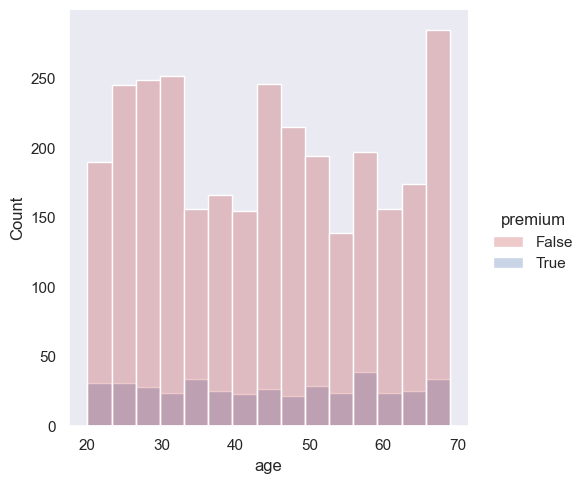

In [156]:
sns.displot(data = own, x = 'age',
                    hue = 'premium',
                    palette = ['r', 'b'],
                    alpha = 0.3,
                    kde = False)
plt.grid()

-изходя из данных видем что число клиентов без премиум функции меньше чем число премиум клиентов.

-распределение возраста у клиентов без премиум функции более ровное.

-самое большое число премиум клиентов среди 70 лет

#### 6.Постройте график распределения числа успешных операций

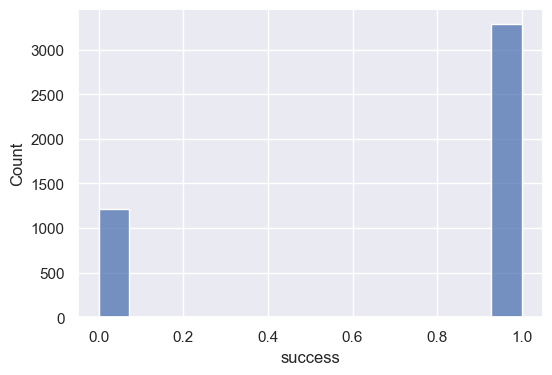

In [17]:
sns.histplot(logs.success)
sns.set()

#### 7.Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста,


Клиенты какого возраста совершили наибольшее количество успешных действий?

In [215]:
success_computer = own.query('platform == "computer" & success == True')\
                      .groupby('age', as_index = False)\
                      .agg({'success':'count'})
success_computer.head()

,age,success
0,20,11
1,21,15
2,22,8
3,23,15
4,24,26


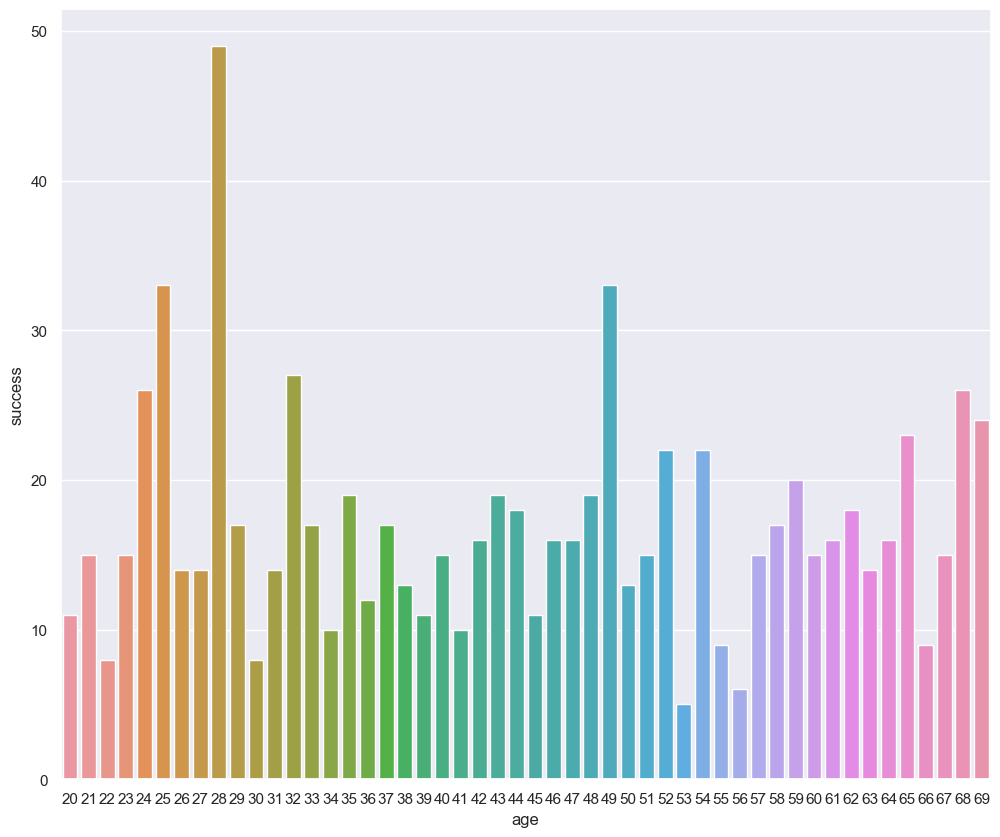

In [212]:
sns.barplot(x = success_computer.age, y = success_computer.success)
sns.set(rc = {'figure.figsize':(14,10)})

In [245]:
top_age = own.query('platform == "computer" & success == True')\
             .age.value_counts()\
             .idxmax()
top_age

28

Максимальное число успешных операции у клиентов возраста 28 лет

По итогам работы удалось узнать что :
   - большее кол-во успешных операции у 10 клиентов c ID = 12179, 61468, 52870, 61473, 92584, 82563, 78349, 36165, 28719
   -  c платормы 'phone' осуществляется большее число успешных операций, и этой платформы больше всего премиум клиентов
   - самое большое число премиум клиентов среди 70 лет
   - а самое большое число успешных операции совершают пользователи 24-25, 28 и 49 лет
   - самое наименьшее число операций среди пользователей 22, 30, 53,56 лет.